In [ ]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
import seaborn as sns

from scipy.optimize import curve_fit

import matplotlib.ticker as ticker

Text(0, 0.5, '$ \\omega $ /   $K1$ ')

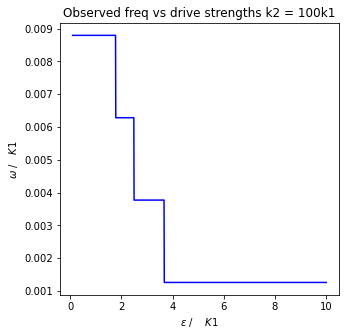

In [16]:
N = 5
k1 = 1
k2 = 100 * k1
d = 0.01 * k1
a = destroy(N)

E_range = np.linspace(0.1,10,1000) # Range of drive strengths.
wlist_100k1 = []
for E in E_range:
     
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())

    c1 = np.sqrt(2*k1) * a.dag() 
    c2 = np.sqrt(2*k2) * (a**2)
    Collapse = [c1 , c2]

    wlist2 = np.linspace(-2, 2,10000) * 2 * np.pi
    spec2 = spectrum(H, wlist2, Collapse, a.dag(), a)

    W_observed = wlist2[spec2.argmax()] 
                                         
    wlist_100k1.append(W_observed)


fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(E_range , wlist_100k1 , 'b' )
plt.title("Observed freq vs drive strengths k2 = 100k1")
plt.xlabel(r'$ \epsilon $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')


Text(0, 0.5, '$ \\omega $ /   $K1$ ')

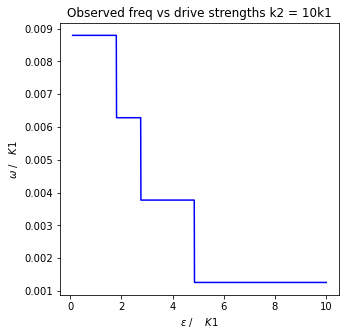

In [17]:
N = 5
k1 = 1
k2 = 10 * k1
d = 0.01 * k1
a = destroy(N)

E_range = np.linspace(0.1,10,1000) # Range of drive strengths.
wlist_10k1 = []
for E in E_range:
     
    H = d* k1 *(a.dag() * a) + (E)*(a + a.dag())

    c1 = np.sqrt(2*k1) * a.dag() 
    c2 = np.sqrt(2*k2) * (a**2)
    Collapse = [c1 , c2]

    wlist2 = np.linspace(-2, 2,10000) * 2 * np.pi
    spec2 = spectrum(H, wlist2, Collapse, a.dag(), a)

    W_observed = wlist2[spec2.argmax()] 
                                         
    wlist_10k1.append(W_observed)


fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(E_range , wlist_1k1 , 'b' )
plt.title("Observed freq vs drive strengths k2 = 10k1")
plt.xlabel(r'$ \epsilon $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')

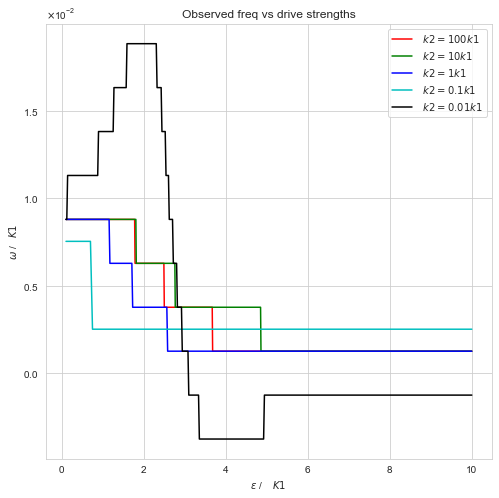

In [49]:
wlist_1k1 = np.load('VdP freq vs drive , 1 k1.npy')
wlist_01k1 = np.load('VdP freq vs drive , 0.1 k1.npy')
wlist_001k1 = np.load('VdP freq vs drive , 0.01 k1.npy')

sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 1, figsize=(8,8))

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.yaxis.set_major_formatter(formatter)

axes.plot( np.linspace(0.1,10,1000), wlist_100k1 , 'r' , label = r' $k2 = 100 k1 $' )
axes.plot( np.linspace(0.1,10,1000), wlist_10k1 , 'g', label = r' $k2 = 10 k1 $' )
axes.plot( np.linspace(0.1,10,500), wlist_1k1 , 'b', label = r' $k2 = 1 k1 $' )
axes.plot( np.linspace(0.1,10,200), wlist_01k1 , 'c' , label = r' $k2 = 0.1 k1 $')
axes.plot( np.linspace(0.1,10,500), wlist_001k1 , 'k', label = r' $k2 = 0.01 k1 $' )
plt.title("Observed freq vs drive strengths")
plt.xlabel(r'$ \epsilon $ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')
plt.legend()


# Might be worth changing how many lines are on the same graph,could be quite a lot to look at.
